<a href="https://colab.research.google.com/github/TivsLThree/FlagCNN/blob/master/CNN/FlagCNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Old Image loading


In [45]:
from skimage import io
import numpy as np
import matplotlib.pyplot as plt
from keras.utils import np_utils as nu
import cv2

flag_names = ["australia","canada","china","cuba","japan","malaysia","monaco","peru","poland","singapore","usa","vietnam"];
flag_dict = {k:v for (v,k) in enumerate(flag_names)}
flag_dict_inv = {k:v for (k,v) in enumerate(flag_names)}
def retrieve_data():
  images = []
  labels = []
  for f in flag_names:
    i = 1;
    while i > 0:
      try:
          im = io.imread("https://github.com/TivsLThree/FlagCNN/blob/master/Images/" + f +"_" + str(i) + ".png?raw=true");
          im = im[:,:,:3] # get rid of transparency. 
          #res = cv2.resize(im, dsize=(23 * 40, 13 * 40), interpolation=cv2.INTER_CUBIC)
          #im = im.reshape((1,) + im.shape)
          labels.append(flag_dict[f])
          images.append(im)
      except:
          i = -999;
      i += 1
  labels = nu.to_categorical(labels)
  return (images, labels)
images, labels = retrieve_data();



#New Image Loading

In [54]:
import urllib
import json
from PIL import Image
import requests
from io import BytesIO
from keras.utils import np_utils as nu
def retrieve_data():
  url = "https://flagcdn.com/en/codes.json"
  req = urllib.request.Request(url, headers={'User-Agent' : "Magic Browser"}) 
  con = urllib.request.urlopen( req )
  keys = json.loads(con.read())
  ##############################################
  #flag_dict = {k:v for (v,k) in enumerate(flag_names)}
  #flag_dict_inv = {k:v for (k,v) in enumerate(flag_names)}
  ###############################################
  imgurl = "https://flagcdn.com/"
  sizeurl = "16x12"
  filetype = ".webp" # for some reason the other file types do not work. 
  images = [];
  labels = [];
  i = 0;
  for k in keys:
    url = imgurl + sizeurl + "/"+k + filetype;
    response = requests.get(url)
    img = Image.open(BytesIO(response.content))
    img = np.asarray(img, dtype=np.integer)
    img = img[:,:,:3]
    labels.append(i); i +=1;
    images.append(img)
    print("Loaded " + keys[k] + sizeurl)
  labels = nu.to_categorical(labels)
  return (np.array(images), labels)
images, labels = retrieve_data();

Loaded Andorra16x12
Loaded United Arab Emirates16x12
Loaded Afghanistan16x12
Loaded Antigua and Barbuda16x12
Loaded Anguilla16x12
Loaded Albania16x12
Loaded Armenia16x12
Loaded Angola16x12
Loaded Antarctica16x12
Loaded Argentina16x12
Loaded American Samoa16x12
Loaded Austria16x12
Loaded Australia16x12
Loaded Aruba16x12
Loaded Åland Islands16x12
Loaded Azerbaijan16x12
Loaded Bosnia and Herzegovina16x12
Loaded Barbados16x12
Loaded Bangladesh16x12
Loaded Belgium16x12
Loaded Burkina Faso16x12
Loaded Bulgaria16x12
Loaded Bahrain16x12
Loaded Burundi16x12
Loaded Benin16x12
Loaded Saint Barthélemy16x12
Loaded Bermuda16x12
Loaded Brunei16x12
Loaded Bolivia16x12
Loaded Caribbean Netherlands16x12
Loaded Brazil16x12
Loaded Bahamas16x12
Loaded Bhutan16x12
Loaded Bouvet Island16x12
Loaded Botswana16x12
Loaded Belarus16x12
Loaded Belize16x12
Loaded Canada16x12
Loaded Cocos (Keeling) Islands16x12
Loaded DR Congo16x12
Loaded Central African Republic16x12
Loaded Republic of the Congo16x12
Loaded Switzer

In [55]:
images.shape

(306, 12, 16, 3)

#Loaded images


<Figure size 432x288 with 0 Axes>

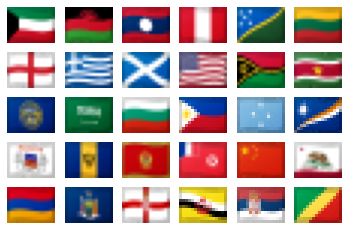

In [83]:
num = 6;
plt.figure()
f, ax = plt.subplots(num-1, num)
im = images.copy();
np.random.shuffle(im)

for i in range(num-1):
  for j in range(num):
    ax[i][j].axis('off')
    ax[i][j].imshow(im[i*num + j])
    #plt.show()

In [112]:
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers
import cv2
from PIL import Image
import tensorflow as tf


def recolor(image, r =0.1):
  r = np.random.uniform(-r, r);
  return tf.image.adjust_hue(image=image, delta=r)
d = ImageDataGenerator(preprocessing_function=recolor, 
                       rescale= 1./255,rotation_range=2.7, 
                       width_shift_range= .2, height_shift_range= .2, 
                       zoom_range= .15, brightness_range=[0.8,1.1], 
                       channel_shift_range=20)
#it = td.flow(X, Y)
train_gen = d.flow(x=images, y=labels, batch_size=32);

validation_datagen = ImageDataGenerator(preprocessing_function=recolor, 
                       rescale= 1./255,rotation_range=2.7, 
                       width_shift_range= .2, height_shift_range= .2, 
                       zoom_range= .15, brightness_range=[0.8,1.1], 
                       channel_shift_range=20);
# DO NOT DO THIS. I realized I used my train data set as my validation data set at the same time. This is bad. Do not cross contaminate. 
#thooough, the train dataset is all augmented
valid_gen = validation_datagen.flow(x = np.array(images), y = np.array(labels))
def fname(pred_array):
  name = np.argmax(pred_array);
  retval = keys[list(keys)[name]]
  return retval
while True:
  print(fname(next(train_gen)[1]))


Egypt
Cocos (Keeling) Islands
Vermont
Latvia
Uzbekistan
Gambia
Nauru
Nicaragua
Guatemala
Greenland
Bermuda
Slovakia
Samoa
Suriname
Liechtenstein
Liberia
Haiti
Western Sahara
Nebraska
Zambia
Bosnia and Herzegovina
Saint Pierre and Miquelon
Aruba
Burundi
Isle of Man
Guam
Saint Kitts and Nevis
Timor-Leste
Iran
Missouri
Western Sahara
Cameroon
United Kingdom
China
Oman
Idaho
Missouri
Romania
Utah
Netherlands
West Virginia
South Korea
Burundi
Afghanistan
Mali
Kuwait
Florida
Samoa
India
Aruba
Chad
Denmark
United Kingdom
Syria
Monaco
Austria
Aruba
Iceland
England
Jordan
Vietnam
Fiji
Mississippi
Indonesia
Myanmar
Guatemala
Barbados
Monaco
Niue
Samoa
Mississippi
Bolivia
Arkansas
Peru
Botswana
Dominica
Lesotho
Macau
Russia
Denmark
Cyprus
Czechia
Oklahoma
Delaware
North Korea
Palau
Marshall Islands
Maryland
New Hampshire
South Sudan
Delaware
Liechtenstein
China
Switzerland
Cuba
Isle of Man
United Kingdom
Georgia
North Macedonia
India
South Carolina
Qatar
Malawi
Tuvalu
United Arab Emirates
Sloveni

KeyboardInterrupt: ignored

### Augmented Images

<Figure size 432x288 with 0 Axes>

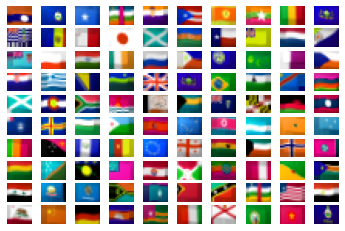

In [114]:
aX = None;
aY = None;
num = 10
for i in range(num):
  augX, augY = next(train_gen)
  if(aX is None):  
    aX = augX;
    aY = augY;
  else:
    aX = np.concatenate((aX, augX))
    aY = np.concatenate((aY, augY))


plt.figure()
f, ax = plt.subplots(num, num)
np.random.shuffle(im)

for i in range(num):
  for j in range(num):
    ax[i][j].axis('off')
    #s = str(flag_dict_inv[np.argmax(aY[i*num + j])])
    #ax[i][j].set_title(s)
    #print(aX[i*num + j] / 10)
    ax[i][j].imshow(aX[i*num + j])
    #plt.show()


\# Install dependencies <br>
!apt install graphviz<br>
!pip install pydot pydot-ng<br>
!echo "Double check with Python 3"<br>
!python -c "import pydot"<br>
<br>
\# Restart runtime to allow Jupyter to know the changes above<br>
import os<br>
os._exit(0)<br>

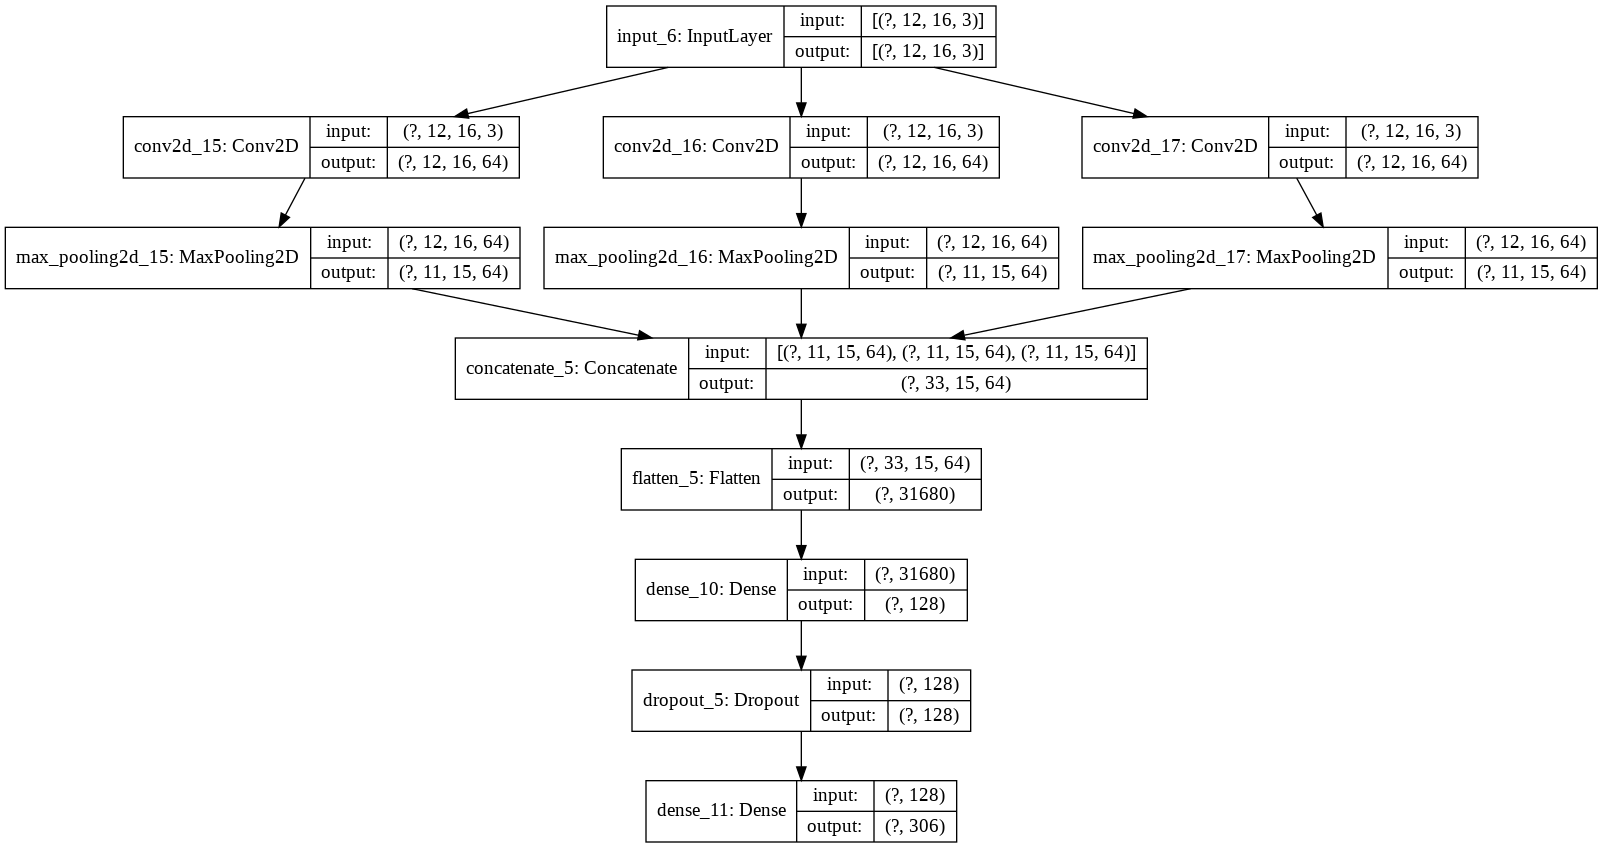

In [115]:
import keras.layers as layers
import keras

def create_covnet():
  x = layers.Input(shape = (12, 16,3))
  branch1 = layers.Conv2D(filters = 64, kernel_size=(7,7), padding = 'same', activation='relu')(x)
  branch1 = layers.MaxPool2D(pool_size=(2,2), strides = 1)(branch1);

  branch2 = layers.Conv2D(filters = 64, kernel_size=(5,5), padding = 'same', activation='relu')(x)
  branch2 = layers.MaxPool2D(pool_size=(2,2), strides = 1)(branch2);

  branch3 = layers.Conv2D(filters = 64, kernel_size=(3,3), padding = 'same', activation='relu')(x)
  branch3 = layers.MaxPool2D(pool_size=(2,2), strides = 1)(branch3);

  merged = layers.concatenate([branch1, branch2, branch3], axis=1);
  merged = layers.Flatten()(merged)

  out = layers.Dense(128, activation='relu')(merged);
  out = layers.Dropout(0.2)(out);
  out = layers.Dense(len(keys.values()), activation="softmax")(out);
  model = keras.Model(x, out);

  return model;
cnn = create_covnet();

cnn.compile(loss="categorical_crossentropy", optimizer='adam', metrics = ['accuracy'])
#cnn.summary()
keras.utils.plot_model(cnn, show_shapes=True, show_layer_names=True, to_file='model.png');
from IPython.display import Image
Image(retina=True, filename='model.png')

In [ ]:
history = cnn.fit_generator(train_gen, steps_per_epoch= images.shape[0] // 32, epochs=100, validation_data=valid_gen, validation_steps=len(images));

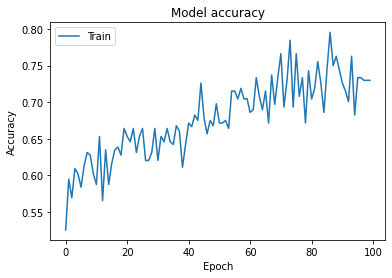

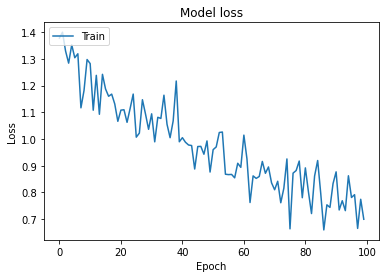

In [121]:


# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
#plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
#plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

#cnn.save("flag_cnn.h5")

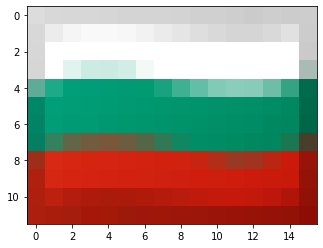

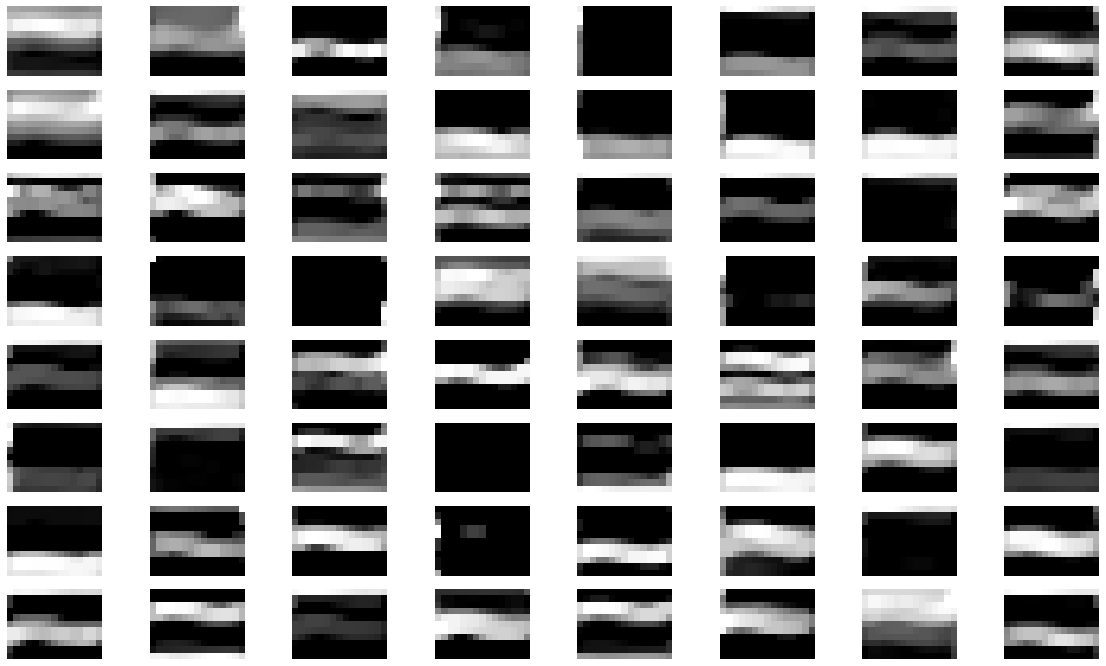

In [125]:
from keras.models import Model
layer_outputs = [layer.output for layer in cnn.layers]
activation_model = Model(inputs=cnn.input, outputs=layer_outputs)
example = 21;
activations = activation_model.predict(images[example].reshape((1,)+images[10].shape))
plt.imshow(images[example])
#plt.imshow(images[example+1])
def display_activation(activations, col_size, row_size, act_index): 
    activation = activations[act_index]
    activation_index=0
    fig, ax = plt.subplots(row_size, col_size, figsize=(row_size*2.5,col_size*1.5))
    for row in range(0,row_size):
        for col in range(0,col_size):
            ax[row][col].axis('off')
            ax[row][col].imshow(activation[0, :, :, activation_index], cmap='gray')
            activation_index += 1
display_activation(activations, 8, 8, 6)

Looks good enough to try out!

In [126]:
!pip install tensorflowjs
from google.colab import files
cnn.save("keras.h5")
!mkdir model
!tensorflowjs_converter --input_format keras keras.h5 model/
!zip -r model.zip model 

files.download('model.zip')

     |████████████████████████████████| 61kB 1.9MB/s 
     |████████████████████████████████| 92kB 4.5MB/s 
     |████████████████████████████████| 137.3MB 82kB/s 
     |████████████████████████████████| 256kB 43.9MB/s 
  Created wheel for PyInquirer: filename=PyInquirer-1.0.3-cp36-none-any.whl size=32852 sha256=e690dd4b2f8f84534bd0f6d09f62fbc6a48ed58400cf143918d62efd2240c51a
  Stored in directory: /root/.cache/pip/wheels/52/6c/b1/3e4b0e8daf42a92883c7641c0ea8ffb62e0490ebed2faa55ad
Successfully built PyInquirer
  Found existing installation: prompt-toolkit 1.0.18
    Uninstalling prompt-toolkit-1.0.18:
      Successfully uninstalled prompt-toolkit-1.0.18
  Found existing installation: tensorflow-hub 0.9.0
    Uninstalling tensorflow-hub-0.9.0:
      Successfully uninstalled tensorflow-hub-0.9.0


  adding: model/ (stored 0%)
  adding: model/group1-shard4of4.bin (deflated 7%)
  adding: model/group1-shard2of4.bin (deflated 7%)
  adding: model/model.json (deflated 82%)
  adding: model/group1-shard3of4.bin (deflated 7%)
  adding: model/group1-shard1of4.bin (deflated 7%)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>